In [1]:
# dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import numpy as np
from scipy.stats import linregress
import requests
import time
import json

master_csv = "archive/Master.csv"
salaries_csv = "archive/Salaries.csv"
teams_csv = "archive/Teams.csv"

In [2]:
#read in csv files
master_df = pd.read_csv(master_csv)
#master_df.head()
salaries_df = pd.read_csv(salaries_csv)
#salaries_df.head()
teams_df = pd.read_csv(teams_csv)
#teams_df

#filter batting df 
#filtered_batting_df = batting_df.loc[batting_df['yearID'] > 1999]
#filtered_batting_df

# Combine the data into a single dataset
bball_data_merge = pd.merge(master_df, salaries_df, how="left", on="playerID")

# Display the data table for preview
bball_data_merge.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,bats,throws,debut,finalGame,retroID,bbrefID,yearID,teamID,lgID,salary
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,2004.0,SFN,NL,300000.0
1,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,2007.0,CHA,AL,387500.0
2,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,2008.0,BOS,AL,403250.0
3,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,2009.0,SEA,AL,419000.0
4,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,2010.0,SEA,AL,2750000.0


In [3]:
#list(bball_data_merge.columns) 

In [4]:
#drop unneed columns
cleaned_df = bball_data_merge.drop(['birthMonth',
                                    'birthDay',
                                    'deathYear',
                                    'deathMonth',
                                    'deathDay',
                                    'deathCountry',
                                    'deathState',
                                    'deathCity',
                                    'nameFirst',
                                    'nameLast',
                                    'nameGiven',
                                    'weight',
                                    'height',
                                    'bats',
                                    'throws',
                                    'debut',
                                    'finalGame',
                                    'retroID',
                                    'bbrefID',                                   
                                     ], axis = 1)

cleaned_df.head()

,playerID,birthYear,birthCountry,birthState,birthCity,yearID,teamID,lgID,salary
0,aardsda01,1981.0,USA,CO,Denver,2004.0,SFN,NL,300000.0
1,aardsda01,1981.0,USA,CO,Denver,2007.0,CHA,AL,387500.0
2,aardsda01,1981.0,USA,CO,Denver,2008.0,BOS,AL,403250.0
3,aardsda01,1981.0,USA,CO,Denver,2009.0,SEA,AL,419000.0
4,aardsda01,1981.0,USA,CO,Denver,2010.0,SEA,AL,2750000.0


In [5]:
#list(cleaned_df.columns) 

In [12]:
#df.dropna(subset = ["column2"], inplace=True)

#Rename cleaned_df columns and change df to salary_df
salary_df = cleaned_df.rename(columns={'playerID': 'Player ID',
                                         'birthYear': 'Birth Year',
                                         'birthCountry': 'Birth Country',
                                         'birthState': 'Birth State',
                                         'birthCity': 'Birth City',
                                         'yearID': 'Year ID',
                                         'teamID': 'Team ID',
                                         'lgID': 'League',
                                         'salary':'Salary'
                                     })

#Narrow down dataset to 2000 - 2015 years and remove NaN values in Salary column
salary_df = salary_df.loc[salary_df['Salary'].isnull() == False]
salary_df = salary_df.loc[salary_df['Year ID'] > 1999]
salary_df = pd.DataFrame(salary_df)
salary_df.head()

,Player ID,Birth Year,Birth Country,Birth State,Birth City,Year ID,Team ID,League,Salary
0,aardsda01,1981.0,USA,CO,Denver,2004.0,SFN,NL,300000.0
1,aardsda01,1981.0,USA,CO,Denver,2007.0,CHA,AL,387500.0
2,aardsda01,1981.0,USA,CO,Denver,2008.0,BOS,AL,403250.0
3,aardsda01,1981.0,USA,CO,Denver,2009.0,SEA,AL,419000.0
4,aardsda01,1981.0,USA,CO,Denver,2010.0,SEA,AL,2750000.0


In [36]:
# Save summary_city_df as a csv
output_salary_summary = salary_df
# Note to avoid any issues later, use encoding="utf-8"
output_salary_summary.to_csv("salary_summary_WJR.csv", encoding="utf-8", index=False)

In [13]:
#group by birth country (highest level of distribution of players)
birth_country = salary_df.groupby(['Birth Country'])

#create each variable
player_count = birth_country['Player ID'].nunique()
mean_salary = birth_country.mean()['Salary']
median_salary = birth_country.median()['Salary']
max_salary = birth_country['Salary'].max()
min_salary = birth_country['Salary'].min()
var_salary = birth_country.var()['Salary']
std_dev_salary = birth_country.std()['Salary']
sems_salary = birth_country.sem()['Salary']

#player birth country summary table
summary_country_df = pd.DataFrame({"Number of Players": player_count,
                                   "Mean Player Salary": mean_salary,
                                   "Median Player Salary": median_salary,
                                   "Max Player Salary": max_salary,
                                   "Min Player Salary": min_salary,
                                   "Player Salary Variance": var_salary,
                                   "Player Salary Std. Dev.": std_dev_salary,
                                   "Player Salary Std. Error": sems_salary})

#format columns
summary_country_df = summary_country_df.sort_values(by=['Number of Players'], ascending=False)
summary_country_df['Mean Player Salary'] = summary_country_df['Mean Player Salary'].map("${:,.0f}".format)
summary_country_df['Median Player Salary'] = summary_country_df['Median Player Salary'].map("${:,.0f}".format)
summary_country_df['Max Player Salary'] = summary_country_df['Max Player Salary'].map("${:,.0f}".format)
summary_country_df['Min Player Salary'] = summary_country_df['Min Player Salary'].map("${:,.0f}".format)
summary_country_df['Player Salary Variance'] = summary_country_df['Player Salary Variance'].map("${:,.0f}".format)
summary_country_df['Player Salary Std. Dev.'] = summary_country_df['Player Salary Std. Dev.'].map("${:,.0f}".format)
summary_country_df['Player Salary Std. Error'] = summary_country_df['Player Salary Std. Error'].map("${:,.0f}".format)

summary_country_df = summary_country_df.reset_index()
summary_country_df

,Birth Country,Number of Players,Mean Player Salary,Median Player Salary,Max Player Salary,Min Player Salary,Player Salary Variance,Player Salary Std. Dev.,Player Salary Std. Error
0,USA,2326,"$2,947,412","$1,000,000","$33,000,000","$200,000","$16,752,378,715,366","$4,092,967","$41,702"
1,D.R.,314,"$3,279,718","$1,025,000","$24,000,000","$200,000","$20,175,008,229,502","$4,491,660","$123,676"
2,Venezuela,172,"$2,989,871","$850,000","$24,857,000","$165,574","$19,403,512,906,123","$4,404,942","$156,622"
3,P.R.,81,"$3,611,600","$1,412,500","$19,700,000","$200,000","$19,742,473,543,067","$4,443,250","$216,294"
4,CAN,48,"$3,391,683","$1,375,000","$18,910,655","$200,000","$18,591,768,220,585","$4,311,817","$300,419"
5,Japan,46,"$4,900,168","$3,250,000","$22,000,000","$212,000","$22,504,246,432,235","$4,743,864","$355,568"
6,Mexico,42,"$2,006,542","$900,000","$14,000,000","$200,000","$6,784,818,402,732","$2,604,768","$183,271"
7,Cuba,41,"$3,336,567","$2,583,334","$10,500,000","$200,000","$8,306,772,452,874","$2,882,147","$225,058"
8,Panama,19,"$4,195,637","$1,043,750","$19,000,000","$200,000","$29,082,384,305,181","$5,392,809","$562,239"
9,South Korea,14,"$3,504,940","$762,500","$15,505,142","$210,000","$22,241,507,750,835","$4,716,090","$687,912"


In [32]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.

# One method to do this is the following, but you can use whatever method works for you.

##############################################################################
# Put countries into a list for for loop (and later for plot labels)
countries = ["USA", "D.R.", "Venezuela", "P.R.", "CAN", "Japan", "Mexico", "Cuba"]

# Create empty list to fill with salary data (for plotting)
salary_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for country in countries:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    avg_salary_data = salary_df.loc[salary_df["Birth Country"] == country, 'Salary']
    
    # add subset 
    salary_data.append(avg_salary_data)
    
    # Determine outliers using upper and lower bounds
    quartiles = avg_salary_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = avg_salary_data.loc[(avg_salary_data < lower_bound) | (avg_salary_data > upper_bound)]
    print(f"{country} has {len(outliers)} outliers out of {len(avg_salary_data)} or {(len(outliers) / len(avg_salary_data))*100}% .")
    

USA has 801 outliers out of 9633 or 8.315166614761758% .
D.R. has 133 outliers out of 1319 or 10.083396512509477% .
Venezuela has 79 outliers out of 791 or 9.987357774968395% .
P.R. has 40 outliers out of 422 or 9.47867298578199% .
CAN has 21 outliers out of 206 or 10.194174757281553% .
Japan has 11 outliers out of 178 or 6.179775280898876% .
Mexico has 23 outliers out of 202 or 11.386138613861387% .
Cuba has 0 outliers out of 164 or 0.0% .


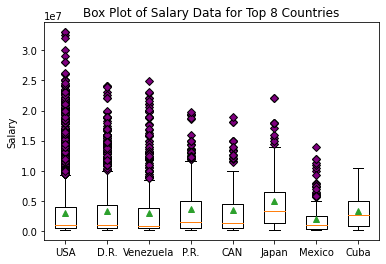

In [33]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.

#box plot
outlier_format = dict(markerfacecolor = 'purple', marker='D', markeredgecolor='black')
plt.boxplot(salary_data, labels = countries, flierprops = outlier_format, showmeans = True)
plt.title("Box Plot of Salary Data for Top 8 Countries")
plt.ylabel('Salary')
plt.show()

In [42]:
#create variables to loc in on certain countries
usa_salary_df = salary_df.loc[salary_df['Birth Country'] == 'USA']
dr_salary_df = salary_df.loc[salary_df['Birth Country'] == 'D.R.']
ven_salary_df = salary_df.loc[salary_df['Birth Country'] == 'Venezuela']
pr_salary_df = salary_df.loc[salary_df['Birth Country'] == 'P.R.']
can_salary_df = salary_df.loc[salary_df['Birth Country'] == 'CAN']
jap_salary_df = salary_df.loc[salary_df['Birth Country'] == 'Japan']

#scatter plot
plt.scatter(usa_salary_df['Year ID'], usa_salary_df['Salary'], color = "blue", label='USA')
plt.scatter(jap_salary_df['Year ID'], jap_salary_df['Salary'], color = "red", label='Japan')
#plt.plot(ven_salary_df['Year ID'], ven_salary_df['Salary'], color = "green", label='Venezuela')
#plt.plot(pr_salary_df['Year ID'], pr_salary_df['Salary'], color = "blue", label='P.R.')
plt.title("USA vs Japan Salary Data")
plt.xlabel("Year", color = "orange")
plt.ylabel("Salaries in Millions $", color = "green")
plt.show()

AttributeError: 'DataFrame' object has no attribute 'map'

In [ ]:
#group by birth city
birth_city = salary_df.groupby(['Birth City'])
cities = []
cities.append(salary_df['Birth City'])


#create each variable
player_count = birth_city['Player ID'].nunique()
mean_salary = birth_city.mean()['Salary']
median_salary = birth_city.median()['Salary']
var_salary = birth_city.var()['Salary']
std_dev_salary = birth_city.std()['Salary']
sems_salary = birth_city.sem()['Salary']

#player birth city summary table
summary_city_df = pd.DataFrame({"Number of Players": player_count,
                              "Mean Player Salary": mean_salary,
                              "Median Player Salary": median_salary,
                              "Player Salary Variance": var_salary,
                              "Player Salary Std. Dev.": std_dev_salary,
                              "Player Salary Std. Error": sems_salary})

#format columns
summary_city_df = summary_city_df.sort_values(by=['Number of Players'], ascending=False)
summary_city_df['Mean Player Salary'] = summary_city_df['Mean Player Salary'].map("${:,.0f}".format)
summary_city_df['Median Player Salary'] = summary_city_df['Median Player Salary'].map("${:,.0f}".format)
summary_city_df['Player Salary Variance'] = summary_city_df['Player Salary Variance'].map("${:,.0f}".format)
summary_city_df['Player Salary Std. Dev.'] = summary_city_df['Player Salary Std. Dev.'].map("${:,.0f}".format)
summary_city_df['Player Salary Std. Error'] = summary_city_df['Player Salary Std. Error'].map("${:,.0f}".format)

output_summary_city = summary_city_df.reset_index()
summary_city_df

In [ ]:
usa_salary_df = salary_df.loc[salary_df['Birth Country'] == 'USA']
usa_salary_df

In [ ]:
#line plot
plt.bar(usa_salary_df['Year ID'], usa_salary_df['Salary'], color = "purple")
plt.title("Avg. Salary vs. State")
plt.xlabel("State", color = "orange")
plt.xticks(rotation = 90)
plt.ylabel("Salary", color = "green")
plt.show()

In [ ]:
#group by birth state
birth_state = usa_salary_df.groupby(['Birth State'])

#print(birth_state)
#create each variable
player_count = birth_state['Player ID'].nunique()
mean_salary = birth_state.mean()['Salary']
median_salary = birth_state.median()['Salary']
max_salary = birth_state['Salary'].max()
min_salary = birth_state['Salary'].min()
var_salary = birth_state.var()['Salary']
std_dev_salary = birth_state.std()['Salary']
sems_salary = birth_state.sem()['Salary']

#player birth city summary table
summary_state_df = pd.DataFrame({"Number of Players": player_count,
                              "Mean Player Salary": mean_salary,
                              "Median Player Salary": median_salary,
                              "Player Salary Variance": var_salary,
                              "Player Salary Std. Dev.": std_dev_salary,
                              "Player Salary Std. Error": sems_salary})

#format columns
summary_state_df = summary_state_df.sort_values(by=['Mean Player Salary'], ascending=False)
summary_state_df['Mean Player Salary'] = summary_state_df['Mean Player Salary'].map("${:,.0f}".format)
summary_state_df['Median Player Salary'] = summary_state_df['Median Player Salary'].map("${:,.0f}".format)
summary_state_df['Player Salary Variance'] = summary_state_df['Player Salary Variance'].map("${:,.0f}".format)
summary_state_df['Player Salary Std. Dev.'] = summary_state_df['Player Salary Std. Dev.'].map("${:,.0f}".format)
summary_state_df['Player Salary Std. Error'] = summary_state_df['Player Salary Std. Error'].map("${:,.0f}".format)

summary_state_df.reset_index()

In [ ]:
#line plot
plt.bar(summary_state_df['Birth State'], summary_state_df['Mean Player Salary'], color = "purple")
plt.title("Avg. Salary vs. State")
plt.xlabel("State", color = "orange")
plt.xticks(rotation = 90)
plt.ylabel("Salary", color = "green")
plt.show()

In [ ]:
#MLB city salary summary
#city salary summary data file
city_salary_path = "../group_1_project/salary_summary_city_WJR.csv"

#read the city salary data file
city_salary_df = pd.read_csv(city_salary_path, dtype="object", encoding="utf-8")
city_salary_df.head() 